## Homework 2  Phys 115
Jesus Javier Serrano
4/18/18

### Problem 1
For the analysis of our function $$f(x) = xe^x$$ we shall apply the following methods of differentiation.

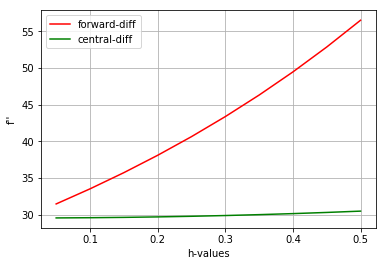

The following are the values shown in the graph above:
h-values: [ 0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5 ]
Forward-difference approximations: [ 31.46979136  33.52282638  35.72625494  38.09190285  40.63257338
  43.36213107  46.29559305  49.44922831  52.8406659   56.48901266]
Centeral-difference approximations: [ 29.56546174  29.5931861   29.63943445  29.70426847  29.78777471
  29.89006463  30.01127488  30.15156748  30.31113012  30.49017645]


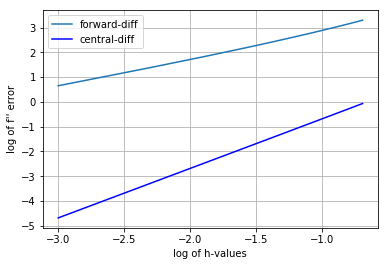

Exponential of h for the forward-difference method is: 1.1484 +/- 0.0179
Exponential of h for the central-difference method is: 2.0045 +/- 0.0009


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

#starting with our function
def fntn(x):
    return x*np.exp(x)

#Given from lecture we know the central-difference method for a second derivative
def c_d_2(y,x,h):
    return (y(x + h) + y(x-h) - 2*y(x))/(h**2)

#building from lecture we may define the forward-difference method for a second derivative as such:
def f_d_2(y,x,h):
    return (y(x + 2*h) + y(x) - 2*y(x + h))/(h**2)

#Now let us calculate the derivateive of our function at x = 2 with different values of h
H = np.arange(0.05,0.55,0.05)
forw_meth = f_d_2(fntn,2,H)#Forward-difference method
cent_meth = c_d_2(fntn,2,H)#Central-difference method
plt.plot(H,forw_meth,'r',label='forward-diff')
plt.plot(H,cent_meth,'g',label='central-diff')
plt.legend()
plt.xlabel("h-values")
plt.ylabel("f''")
plt.grid(True)
plt.show()

print('The following are the values shown in the graph above:')
print('h-values: %s'%str(H))
print('Forward-difference approximations: %s'%str(forw_meth))
print('Centeral-difference approximations: %s'%str(cent_meth))

#Now since we need to calculate the error let us use the exact calculation of the second derivative to be:
def Sc_dif_fntn(x):
    return 2*np.exp(x) + x*np.exp(x)

#Thus the error may be calculated as follows
def error(met,x,h):
    return met(fntn,x,h) - Sc_dif_fntn(x)

#Now let us calculate the error
forw_meth_err = error(f_d_2,2,H) #forward-diff calculation
cent_meth_err = error(c_d_2,2,H) #central-diff calculation

plt.plot(np.log(H),np.log(forw_meth_err),label='forward-diff')
plt.plot(np.log(H),np.log(cent_meth_err),'b',label='central-diff')
plt.legend()
plt.xlabel("log of h-values")
plt.ylabel("log of f'' error")
plt.grid(True)
plt.show()

#finally we may calculate the magnitude of the exponential error for each method:
def fitfunction(x,*p):
    return p[0] + p[1]*x
guessparams = [1, 1]
#line-fit for the error of the forward-difference mehod
popt1, pcov1 = opt.curve_fit(fitfunction, np.log(H), np.log(forw_meth_err), p0=guessparams)
print('Exponential of h for the forward-difference method is: %.4f +/- %.4f'%(popt1[1],np.sqrt(pcov1[1,1])))

#line-fit for the error of the central-difference mehod
popt2, pcov2 = opt.curve_fit(fitfunction, np.log(H), np.log(cent_meth_err),p0=guessparams)
print('Exponential of h for the central-difference method is: %.4f +/- %.4f'%(popt2[1],np.sqrt(pcov2[1,1])))


This is amazing because it shows us that the central-difference method has much less of an error than the forward-difference method and the exponential scale of h for the forward and central difference method agree with the analytical solution. The main reason why we are able to numerically decipher the exponential magnitude of h is due to the analytical theory. Since: $$ \epsilon_{\text{fd}} \propto  h \\
\epsilon_{\text{cd}} \propto  h^2$$
then by simply applying the log to both sides we see that the rate of change for the error is the exponential constant or:
$$ \epsilon \propto  h^n \rightarrow \log(\epsilon) \propto n \log(h)$$
This is a simple linear relation.

### Problem 2

We shall be focusing upon the relativistic Breit-Wigner function:
$$ f(E) = \frac{k}{(E^2 - M^2)^2 + M^2 \Gamma^2}$$
with $$k$$ and particle physics parameter $$\gamma$$ already known and defined (I'll leave this as an exerecise for the grader and reader to reference HW2.pdf to find what k and gamma are).

Beginning with the funciton let us plot it with the following parameters provided:
$$M = 90 \text{GeV}\\
\Gamma = 10\text{GeV}$$


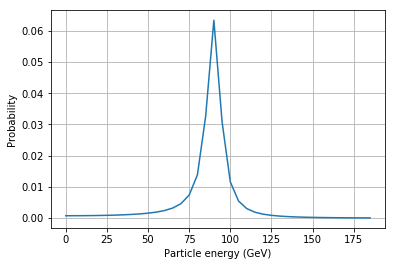

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

#let us start by defining k and gamma in the code:
def gam(m,g):
    return ((m**2)*((m**2) - (g**2)))**0.5

def k(m,g):
    a = (2**1.5)*m*g*gam(m,g)/np.pi
    b = ((m**2) + gam(m,g))**0.5
    return a/b

#now we may define our function:
def brt_wg(E,m,g):
    l = ((E**2) - (m**2))**2 + ((m**2)*(g**2))
    return k(m,g)/l

#We shall use the following range of energy values:
eng = np.arange(0,190,5)

prob_plt = brt_wg(eng,90,10)

#Time to plot the distribution
plt.plot(eng, prob_plt)
plt.xlabel("Particle energy (GeV)")
plt.ylabel("Probability")
plt.grid(True)
plt.show()

Nice, the plot look nice and pointy. We shall now proceed to the fun part which is to integrate the function using the trapezoidal method. Thus let us use the following method:

In [2]:
import scipy.integrate as scint
#the following function uses the parameters a_3, a_4, as the x-points, and y-points respectively

def trap_intgrt(x, y):
    chn_x =len(x) 
    dt = (1/chn_x)*(x[len(x) - 1] - x[0])  
    rvu = []
    for trp in range(chn_x - 1):
        mus = y[trp]
        mus2 = y[trp + 1]
        resl = .5*dt*(mus + mus2)
        rvu.append(resl)
    mass = sum(rvu)
    #print(str(rvu))
    return mass

#We may now integrate our function which we plotted above:
print('The integral of the function using the trapezoidal technique is: %.5f'%trap_intgrt(eng, prob_plt))

#Now let us use simpson's rule to integrate our above function in order to satisfy part c:
def simp_intgrt(inp, y):
    #let's check that our list of data points are odd
    tst = len(inp)%2
    if tst == 0:
        x = inp[0:len(inp)-1]
        print('ERROR: even number of points given. Only utilizing n-1 points')
    elif tst != 0:
        x = inp
    chn_x =len(x)
    dt = (1/chn_x)*(x[len(x) - 1] - x[0])  
    rvu = []
    for strt in range(int((chn_x - 1)/2)):
        trp = 1 + (2*strt)
        mus = y[trp - 1]
        mus1 = y[trp]
        mus2 = y[trp + 1]
        resl = (mus + (4*mus1) + mus2)*dt/3
        rvu.append(resl)
    mass = sum(rvu)
    #print(str(rvu))
    return mass

print('The integral of the function using Simpson technique is: %.5f'%simp_intgrt(eng, prob_plt))

#finally we may use a more definite answer and use it as literature value to compare with our methods

print('The integral of the function using the python package is: %.5f'%scint.trapz(prob_plt, x=eng))


The integral of the function using the trapezoidal technique is: 0.96470
ERROR: even number of points given. Only utilizing n-1 points
The integral of the function using Simpson technique is: 0.93562
The integral of the function using the python package is: 0.99078


If we only want to focus on a certain range of particles, in this case particles with energies that are within the interval of $$[E_{\text{max}} - 3\Gamma, E_{\text{max}} + 3\Gamma] $$, where $$E_{\text{max}}$$ is the energy with the highest probability $$f(E)$$ within the distribution, then we must look only at data points within this range. This means that must cut off data points.

In [3]:
#let us find all energy values within this interval
j = np.where(prob_plt == prob_plt.max())

max_eng = eng[j]
low_lim = max_eng - 30
up_lim = max_eng + 30

#find the low index
l = np.where(eng <= low_lim)

#find the high index
h = np.where(eng >= up_lim)

#We may now create our closed interval
fid_eng = eng[max(l[0]):min(h[0])+1]
fid_prob = prob_plt[max(l[0]):min(h[0])+1]

#Since the integral of the distribution function provides an estimate of total number of particles then
#the ratio of particles within a certain energy interval is equal to the ratio bewtween the improper integral and definite
#integral of the distribution function.

#Let us find the integral of the distribution function within our given interval using our 3 methods:
print('The integral of the function using the trapezoidal technique is: %.5f'%trap_intgrt(fid_eng , fid_prob))
print('The integral of the function using Simpson technique is: %.5f'%simp_intgrt(fid_eng , fid_prob))
print('The integral of the function using the python package is: %.5f'%scint.trapz(fid_prob, x=fid_eng))

print('Thus the fraction of particles that are used in our energy interval is: %.5f'%(float(scint.trapz(fid_prob, x=fid_eng)/scint.trapz(prob_plt, x=eng))))

The integral of the function using the trapezoidal technique is: 0.82990
The integral of the function using Simpson technique is: 0.80376
The integral of the function using the python package is: 0.89905
Thus the fraction of particles that are used in our energy interval is: 0.90742


### Problem 3

We must now perfect our approximation skills and create a clean integral calculation using Romberg's rule. The integral we are left to solve is:
$$\int_{0}^{\pi/2} \frac{d \theta}{1 + \cos(\theta)}$$

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#First, define the function we must integrate with code:
def base(x):
    return 1/(1 + np.cos(x))

#Let us create a function which will partition our x and y arrays in any order of h we define.

def smpl_dat(fntn, a, b, e):
    n = 2**e
    x = np.linspace(a,b,n)
    y = fntn(x)
    return x,y

#We shall start with an h value of about 0.025
x0,y0 = smpl_dat(base, 0, float(np.pi/2), 6)

#A bit more intense calculation will require twice more data points than before
x1,y1 = smpl_dat(base, 0, float(np.pi/2), 7)

#In general
def ordr(base, a, b, i):
    return smpl_dat(base, a, b, 6+i)

#Now we may use Romberg integration 
def rom_int(base, ordr, a, b, mag):
    acc = mag + 1
    master = []
    st_0 = []
    for t in range(acc):
        x,y = ordr(base, a, b, t)
        val = trap_intgrt(x, y)
        st_0.append(val)
    #print initial results
    #print('0-th order calculations: %s'%st_0)
    master.append(st_0)
    #let us define the recursion relation of the romberg integral
    def rom_ord(x_1,x_0,s):
        a = ((4**s)*x_1) - x_0
        b = (4**s) - 1
        return a/b
    #Now to build the several ordered calculations
    for t in range(acc):
        pr_up = t + 1
        ref = master[t]
        new = []
        for n in range(len(range(pr_up,acc))):
            c_1 = ref[n+1]
            c_0 = ref[n]
            nval = rom_ord(c_1,c_0,pr_up)
            new.append(nval)
        #print('%s-th order calculations: %s'%(pr_up,new))
        master.append(new)
    
    #"print(results)
    return master[len(master)-2][0]

#Now let us compare iterations
print(rom_int(base, ordr, 0, float(np.pi/2), 1))
print('')
print(rom_int(base, ordr, 0, float(np.pi/2), 4))
print('')
print(rom_int(base, ordr, 0, float(np.pi/2), 10))
print('')
print(rom_int(base, ordr, 0, float(np.pi/2), 12))
print('')
print(rom_int(base, ordr, 0, float(np.pi/2), 16))

0.9947915334838043

0.9994043511289494

0.9999907051101031

0.9999976762782128

0.9999998547673968


Notice that each increased magnitude in the Rombel integral brings the integral closer to a value of 1, which is the true value of the integral. As for displaying the step calculations properly, we marked each iteration a label at the beginning of each list. Thus it is up to the readder to read carefully and not lose track of the list for EACH step calculation.

### Problem 4

We shall look into the intesnity of light as it diffracts from a straight-edge. The equation given is as follows:
$$I = \frac{I_o}{2}[(\int_0^\nu \cos(\frac{\pi \omega^2}{2}) d\omega + 0.5)^2 + (\int_0^\nu \sin(\frac{\pi \omega^2}{2}) d\omega + 0.5)^2]$$ where we may write $$C(\nu) = \int_0^\nu \cos(\frac{\pi \omega^2}{2}) d\omega$$ and $$S(\nu)= \int_0^\nu \sin(\frac{\pi \omega^2}{2}) d\omega$$ for the Fresnel integral.
Now for defining the intensity equation as a function of $$\nu$$ there doesn't seem to be much that we can do to modify the integrals to manifest a simple function. Then we should expand the intensity equation to then have:
$$\frac{I}{I_o}= \frac{1}{2}[(\int_0^\nu \cos(\frac{\pi \omega^2}{2}) d\omega)^2 + (\int_0^\nu \sin(\frac{\pi \omega^2}{2}) d\omega)^2 + \int_0^\nu \cos(\frac{\pi \omega^2}{2}) + \sin(\frac{\pi \omega^2}{2}) d\omega + 0.5]$$
We can go a bit further and apply a minimum restriction to this equation by using the Cauchy-Schwartz inequality. For any pair of functions f(x) and g(x) we know that $$<f|g> \leq |f||g|$$. In this case we may define the product of the function magnitudes as the squared integrals in our equation. Then:
$$\int_0^\nu \cos(\frac{\pi \omega^2}{2})^2 + \sin(\frac{\pi \omega^2}{2})^2d\omega \leq (\int_0^\nu \cos(\frac{\pi \omega^2}{2}) d\omega)^2 + (\int_0^\nu \sin(\frac{\pi \omega^2}{2}) d\omega)^2$$
Which, with the help of pythagorean identity, then simplifies to be:
$$\nu \leq (\int_0^\nu \cos(\frac{\pi \omega^2}{2}) d\omega)^2 + (\int_0^\nu \sin(\frac{\pi \omega^2}{2}) d\omega)^2$$

Furthermore:
$$\frac{I}{I_o} \geq \nu + 0.5$$

For the sake of accuracy let us use the tarz package

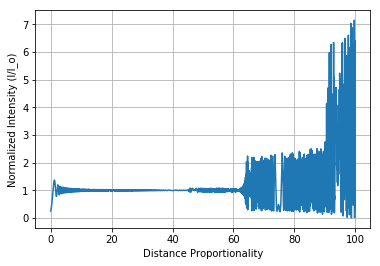

In [5]:
def c_sect(w):
    return np.cos(np.pi*(w**2)/2)

def c_fre(v):
    #st = np.linspace(0,v,100)
    return rom_int(c_sect, ordr, 0, v, 6)

def s_sect(w):
    return np.sin(np.pi*(w**2)/2)

def s_fre(v):
    #st = np.linspace(0,v,100)
    return rom_int(s_sect, ordr, 0, v, 6)

def ints_nrm(v):
    return 0.5*(((c_fre(v) + 0.5)**2) + ((s_fre(v) + 0.5)**2))

#We shall use the functions above to now plot it
nu = np.arange(0,100,0.05)
norm_ints = np.array([])
for i in nu:
    norm_ints = np.append(norm_ints, ints_nrm(i))

plt.plot(nu, norm_ints)
plt.xlabel("Distance Proportionality")
plt.ylabel("Normalized Intensity (I/I_o)")
plt.grid(True)
plt.show()

It seems that as one goes infinitely far then they will be able to see about 100% of the original intensity that hit the straigh edge, how, what? I am unsure if I ran the code correctly because this data seems too preculiar.

In [212]:
for i in nu:
    print(i)

0.0
0.05
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
1.0
1.05
1.1
1.15
1.2
1.25
1.3
1.35
1.4
1.45
1.5
1.55
1.6
1.65
1.7
1.75
1.8
1.85
1.9
1.95
2.0
2.05
2.1
2.15
2.2
2.25
2.3
2.35
2.4
2.45
2.5
2.55
2.6
2.65
2.7
2.75
2.8
2.85
2.9
2.95
3.0
3.05
3.1
3.15
3.2
3.25
3.3
3.35
3.4
3.45
3.5
3.55
3.6
3.65
3.7
3.75
3.8
3.85
3.9
3.95
4.0
4.05
4.1
4.15
4.2
4.25
4.3
4.35
4.4
4.45
4.5
4.55
4.6
4.65
4.7
4.75
4.8
4.85
4.9
4.95
5.0
5.05
5.1
5.15
5.2
5.25
5.3
5.35
5.4
5.45
5.5
5.55
5.6
5.65
5.7
5.75
5.8
5.85
5.9
5.95
6.0
6.05
6.1
6.15
6.2
6.25
6.3
6.35
6.4
6.45
6.5
6.55
6.6
6.65
6.7
6.75
6.8
6.85
6.9
6.95
7.0
7.05
7.1
7.15
7.2
7.25
7.3
7.35
7.4
7.45
7.5
7.55
7.6
7.65
7.7
7.75
7.8
7.85
7.9
7.95
8.0
8.05
8.1
8.15
8.2
8.25
8.3
8.35
8.4
8.45
8.5
8.55
8.6
8.65
8.7
8.75
8.8
8.85
8.9
8.95
9.0
9.05
9.1
9.15
9.2
9.25
9.3
9.35
9.4
9.45
9.5
9.55
9.6
9.65
9.7
9.75
9.8
9.85
9.9
9.95
10.0
10.05
10.1
10.15
10.2
10.25
10.3
10.35
10.4
10.45
10.5
10.55
10.6
10.65
10.7
10.75
10.8
10.85
1

### Problem 5

In this exercise we shall look further into the simple pendulum for large amplitudes where simple harmonic motion can not be used to explain the pendulum.

We shall start with the conservation of energy equation for this system:
$$E = \frac{1}{2}m(l \dot{\theta})^2 + mgl(1 - \cos(\theta))$$
Then by moving all terms to the left we find that:
$$(\frac{d \theta}{dt})^2 = \frac{2}{ml^2}(E - mgl(1 - \cos(\theta))$$
Before we go further, we must note that at the maximum angle the pendulum may ascend to $$\theta_m$$ is also where $$\frac{d \theta}{dt} = 0$$ which then means that $$E = mgl(1 - \cos(\theta_m))$$.With some simple algebra we define $$\cos(\theta_m) = 1 - \frac{E}{mgl}$$. Then:
$$(\frac{d \theta}{dt})^2 = \frac{2}{ml^2}(mgl)(\frac{E}{mgl}-(1 - \cos(\theta))\\
(\frac{d \theta}{dt})^2 = \frac{2}{l}(g)(\cos(\theta) - (1 - \frac{E}{mgl}))\\
(\frac{d \theta}{dt})^2 = \frac{2}{l}(g)(\cos(\theta) - \cos(\theta_m))\\
(\frac{d \theta}{dt}) = \sqrt{\frac{2}{l}(g)(\cos(\theta) - \cos(\theta_m))}\\
\sqrt{\frac{l}{2 g}}\frac{d \theta}{dt} = \sqrt{\cos(\theta) - \cos(\theta_m)}\\$$
Note: $$T_0 = 2 \pi \sqrt{\frac{l}{g}}$$ Then:
$$\frac{T_0}{2 \pi \sqrt{2}}\frac{d \theta}{dt} = \sqrt{\cos(\theta) - \cos(\theta_m)}$$
$$\int_0^{\theta_m}\frac{d \theta}{\sqrt{\cos(\theta) - \cos(\theta_m)}} = \int_0^{T(\theta_m)/4}\frac{2 \pi \sqrt{2}}{T_0} dt$$
Finally we have:
$$\frac{T(\theta_m)}{T_0}= \frac{\sqrt{2}}{\pi}\int_0^{\theta_m}\frac{d \theta}{\sqrt{\cos(\theta) - \cos(\theta_m)}}$$

Looking in the integrand you may notice that the integral is improper. This is due to the singularity present at $\theta = \theta_m$ since the denominator will equal zero at that value. We shall apply a trigonemetric substitution in order to avoid this singularity.

Let us define $\sin(\psi) = \frac{\sin(\frac{\theta}{2})}{\sin(\frac{\theta_m}{2})}$ so that we may work with $\psi$ instead of $\theta$. Defining the infinitesimal element for our integral we get: $\cos(\psi) d \psi= \frac{\cos(\frac{\theta}{2})}{2\sin(\frac{\theta_m}{2})} d\theta$. Also note that $\sqrt{\cos(\theta) - \cos(\theta_m)} = \sqrt{2} \sqrt{\sin^2(\frac{\theta_m}{2}) - \sin^2(\frac{\theta}{2})}$. Then:
$$\frac{T(\theta_m)}{T_0}= \frac{\sqrt{2}}{\pi}\int_0^{\pi/2}\frac{2\sin(\frac{\theta_m}{2}) \cos(\psi) d \psi}{\cos(\frac{\theta}{2})\sqrt{2} \sqrt{\sin^2(\frac{\theta_m}{2}) - \sin^2(\frac{\theta}{2})}}$$
$$\frac{T(\theta_m)}{T_0}= \frac{2}{\pi}\int_0^{\pi/2}\frac{\cos(\psi) d \psi}{\cos(\frac{\theta}{2})\sqrt{1 - \sin^2(\psi)}}$$
$$\frac{T(\theta_m)}{T_0}= \frac{2}{\pi}\int_0^{\pi/2}\frac{\sqrt{1 - \sin^2(\psi)} d \psi}{\sqrt{1 - 2\sin^2(\frac{\theta}{2})}\sqrt{1 - \sin^2(\psi)}}$$
$$\frac{T(\theta_m)}{T_0}= \frac{2}{\pi}\int_0^{\pi/2}\frac{d \psi}{\sqrt{1 - 2\sin^2(\psi)\sin^2(\frac{\theta_m}{2})}}$$

The period for a simple pendulum oscillating with a maximum angle of 0.100 radians is 1.000 seconds
The period for a simple pendulum oscillating with a maximum angle of 0.200 radians is 1.002 seconds
The period for a simple pendulum oscillating with a maximum angle of 0.785 radians is 1.028 seconds
The period for a simple pendulum oscillating with a maximum angle of 1.571 radians is 1.122 seconds
The period for a simple pendulum oscillating with a maximum angle of 2.356 radians is 1.310 seconds


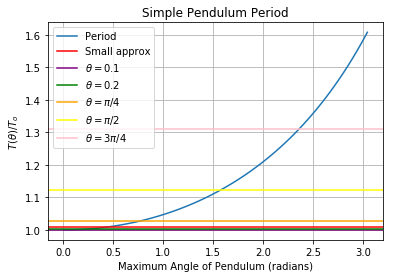

In [54]:
def pend_intg(p, m):
    sin_m = np.sin(m/2)**2
    sin_p = np.sin(p/2)**2
    st = (1 - (2*sin_m*sin_p))**0.5
    coeff = 2/np.pi
    return coeff/st

def simul_perd(m_ar):
    mag_perd = np.array([])
    tall = np.pi/2
    for val in m_ar:
        def sub_pend_intg(p):
            return pend_intg(p, val)
        calc = rom_int(sub_pend_intg, ordr, 0, tall, 6)
        mag_perd = np.append(mag_perd, [calc])
    return mag_perd

m_ar_sample = np.array([0.1, 0.2, np.pi/4, np.pi/2, (3*np.pi)/4])
period_sample = simul_perd(m_ar_sample)
for indx in range(len(m_ar_sample)):
    thet = m_ar_sample[indx]
    t_norm = period_sample[indx]
    print('The period for a simple pendulum oscillating with a maximum angle of %.3f radians is %.3f seconds'%(thet, t_norm))

max_ang = np.pi-0.1
m_ar_one = np.linspace(0, max_ang, 100)
period_meas = simul_perd(m_ar_one)

plt.plot(m_ar_one, period_meas, label='Period')
plt.axhline(y=1.01, color='red', label = 'Small approx')
plt.axhline(y=period_sample[0], color='purple', label = r'$\theta = 0.1$')
plt.axhline(y=period_sample[1], color='green', label = r'$\theta = 0.2$')
plt.axhline(y=period_sample[2], color='orange', label =  r'$\theta = \pi/4$')
plt.axhline(y=period_sample[3], color='yellow', label = r'$\theta = \pi/2$')
plt.axhline(y=period_sample[4], color='pink', label = r'$\theta = 3\pi/4$')
plt.xlabel('Maximum Angle of Pendulum (radians)')
plt.ylabel(r'$T(\theta)/T_o$')
plt.title('Simple Pendulum Period')
plt.legend()
plt.grid(True)
plt.show()


In [53]:
#Let us define a function to find where the period of the simple pendulum intercepts the small angle approximation case.
import scipy.optimize as opt

guess_params = [0.07, 1, 1, 1, 1]

def perd_fit(p, *c):
    return c[0]*p**4 + c[1]*p**3 + c[2]*p**2 + c[3]*p + c[4]

coeff_fit, pcov =opt.curve_fit(perd_fit, m_ar_one, period_meas, p0=guess_params)

def diff_fnct(p):
    return perd_fit(p, *coeff_fit) - 1.01

#Now let us build a naive root finder algorithm by using Newton's method
h = 2E-4
def deriv(fntn, a):
    top = fntn(a + h) - fntn(a)
    return top/h

def root_fnd(fntn, gs):
    iterat = 0
    def dummi_stp(fntn, x):
        ratio = fntn(x)/deriv(fntn, x)
        return x - ratio
    step = gs
    error_chk = 0.0000000000000000001
    score = 1
    while score > error_chk:
        print('Testing step at x = %.2f'%step)
        nu_step = dummi_stp(fntn, step)
        score = diff_fnct(nu_step)
        step = nu_step
        iterat = iterat + 1
    return step, iterat

#Find the root, the angle at which the small angle approximation no longer applies

ultim_angle, tries = root_fnd(diff_fnct, 0.55)
print('The maximum angle at which the small angle approximation is valid is %.4e, found with %s iterations'%(ultim_angle, tries))
        

Testing step at x = 0.55
Testing step at x = 0.49
Testing step at x = 0.48
Testing step at x = 0.48
Testing step at x = 0.48
The maximum angle at which the small angle approximation is valid is 4.8041e-01, found with 5 iterations


At last we see how the period of the simple pendulum will differ from the small angle approximation by about 1%. It turns out that the small angle system is acceptable for angles up to, about, $27^\circ$. This is a really neat constraint we just found from merely applying linear descenet model to find this intercept. 

This marks the end of this homework set

# Post Date 5/14/19